In [1]:
import pandas as pd
import scipy as sp
import scipy.stats as stats
import scipy.stats as linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
combined = "output/true_combined.csv"
combined_df = pd.read_csv(combined)
combined_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,...,TractSNAP,Food Environment Index,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,18092.661348,30141.638549,11064.872922,6835.642497,...,2682,6.9,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,46400.350641,72307.849152,43486.806226,15459.848416,...,6471,7.5,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,6683.975691,9302.717960,1182.176872,3251.362574,...,2097,4.9,413.0,8573.0,44,25,525.0,85.0,771.0,45.0
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,295.614426,295.614426,0.000000,164.903295,...,1125,7.3,407.0,11766.0,40,20,333.0,33.0,561.0,29.0
4,Alabama,Blount,57322,21578,17.911111,52136.000000,5855.939161,7387.084978,3900.420369,2570.900481,...,2900,8.3,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,9400.240856,16730.468695,8914.971285,1816.028671,...,835,8.1,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0
3094,Wyoming,Teton,21294,8973,8.100000,89555.250000,3711.377493,3949.327991,2605.093461,972.594547,...,128,8.0,116.0,3728.0,13,12,104.0,NaN,558.0,8.0
3095,Wyoming,Uinta,21118,7668,14.166667,65312.666667,758.694309,758.694309,13.350968,318.523395,...,621,7.5,234.0,7660.0,28,15,243.0,8.0,475.0,12.0
3096,Wyoming,Washakie,8533,3492,14.133333,62213.666667,1057.246483,2537.470166,885.406917,359.634002,...,337,8.0,97.0,7294.0,28,14,156.0,7.0,174.0,16.0


In [3]:
state = combined_df.loc[combined_df["State"] == "California",:]
the_state = state.iat[0,0]
counties = state["County"].tolist()
x_axis = np.arange(len(counties))

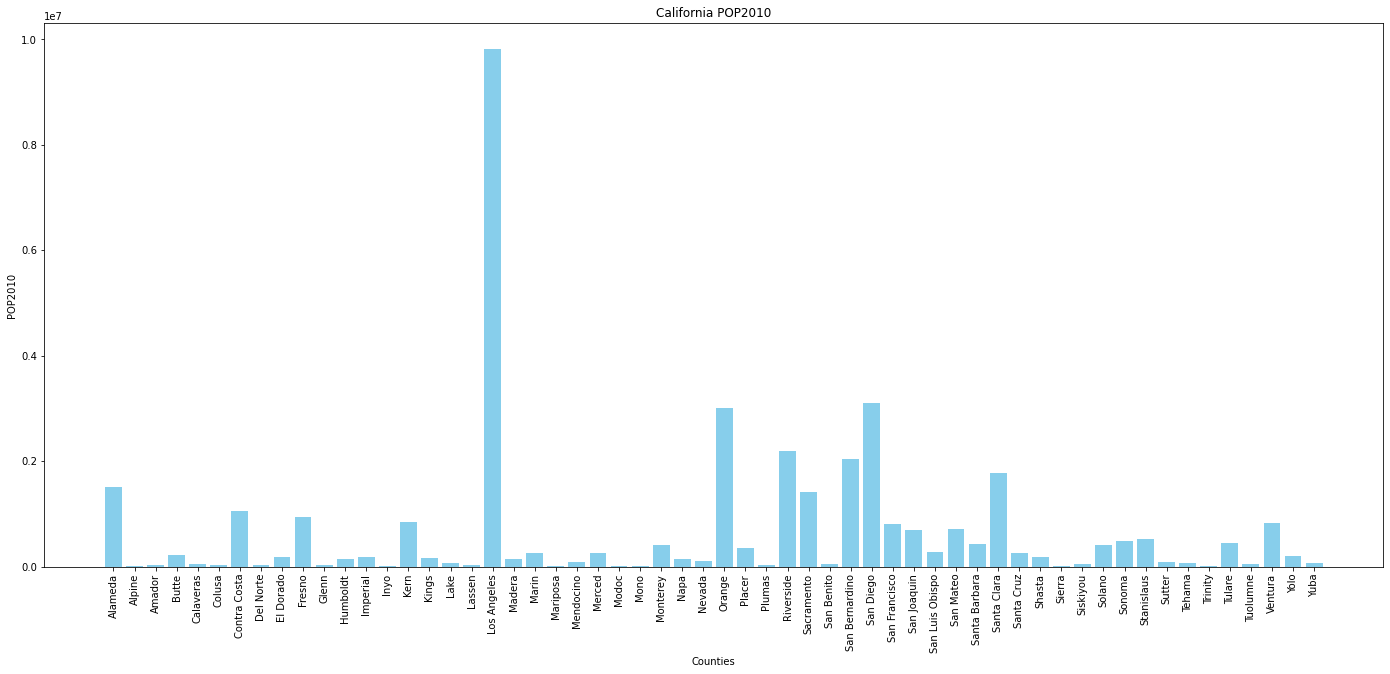

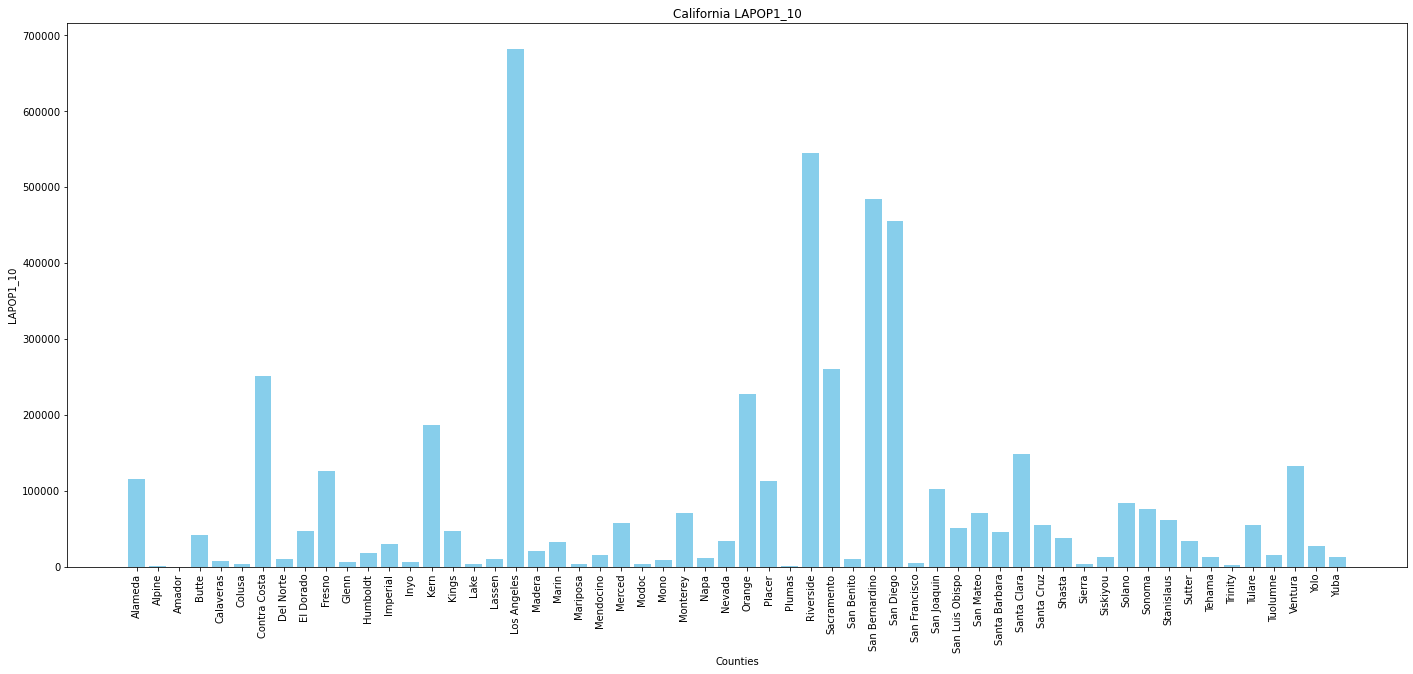

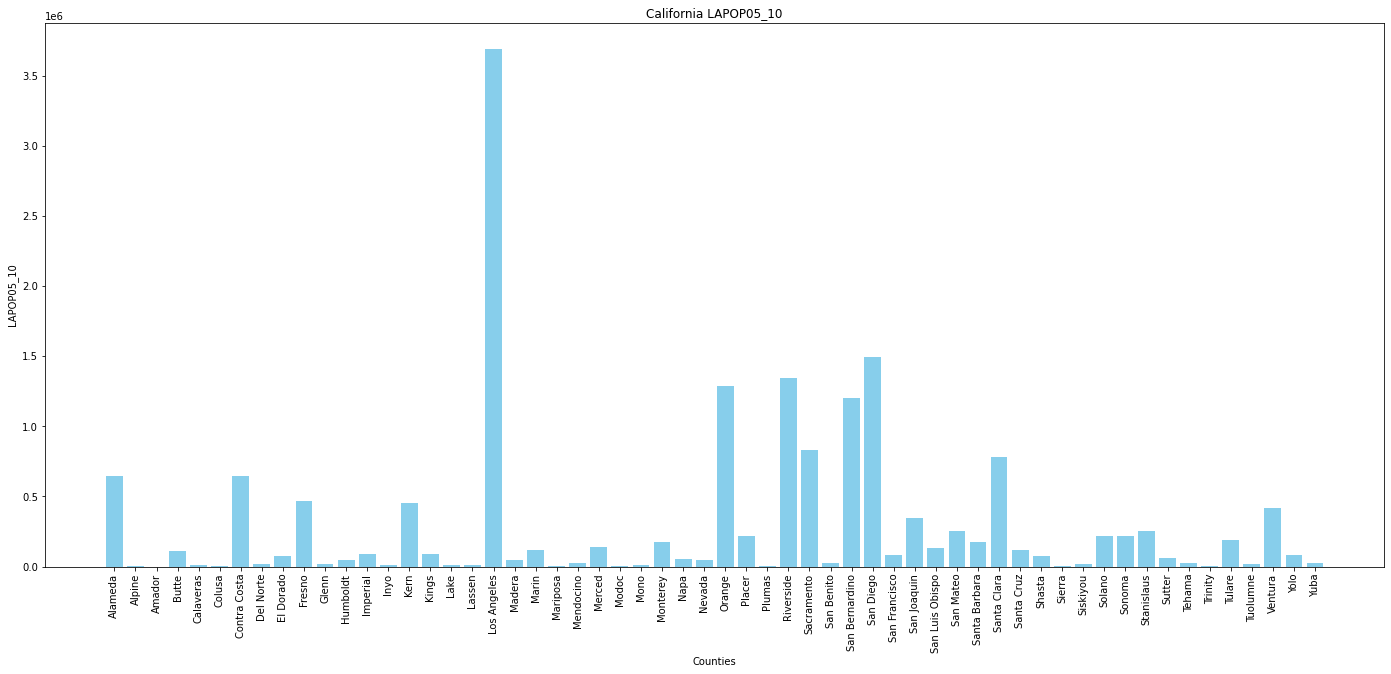

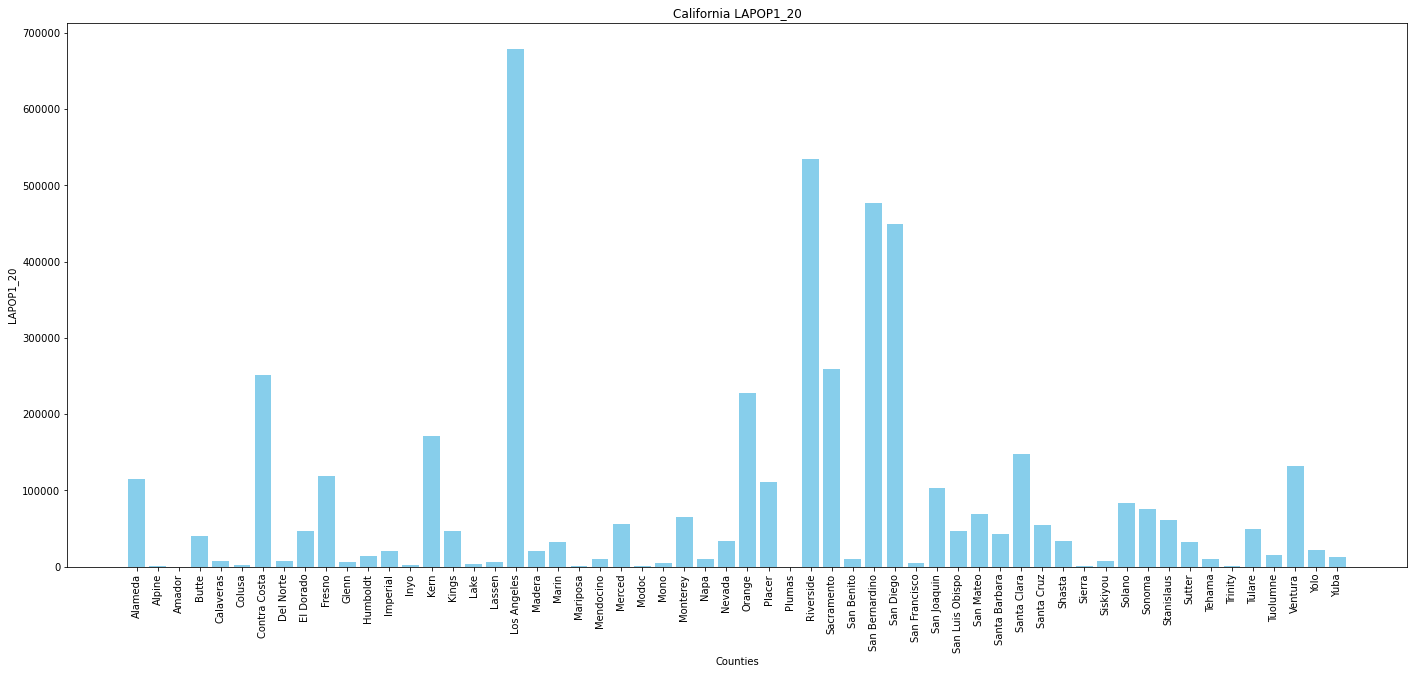

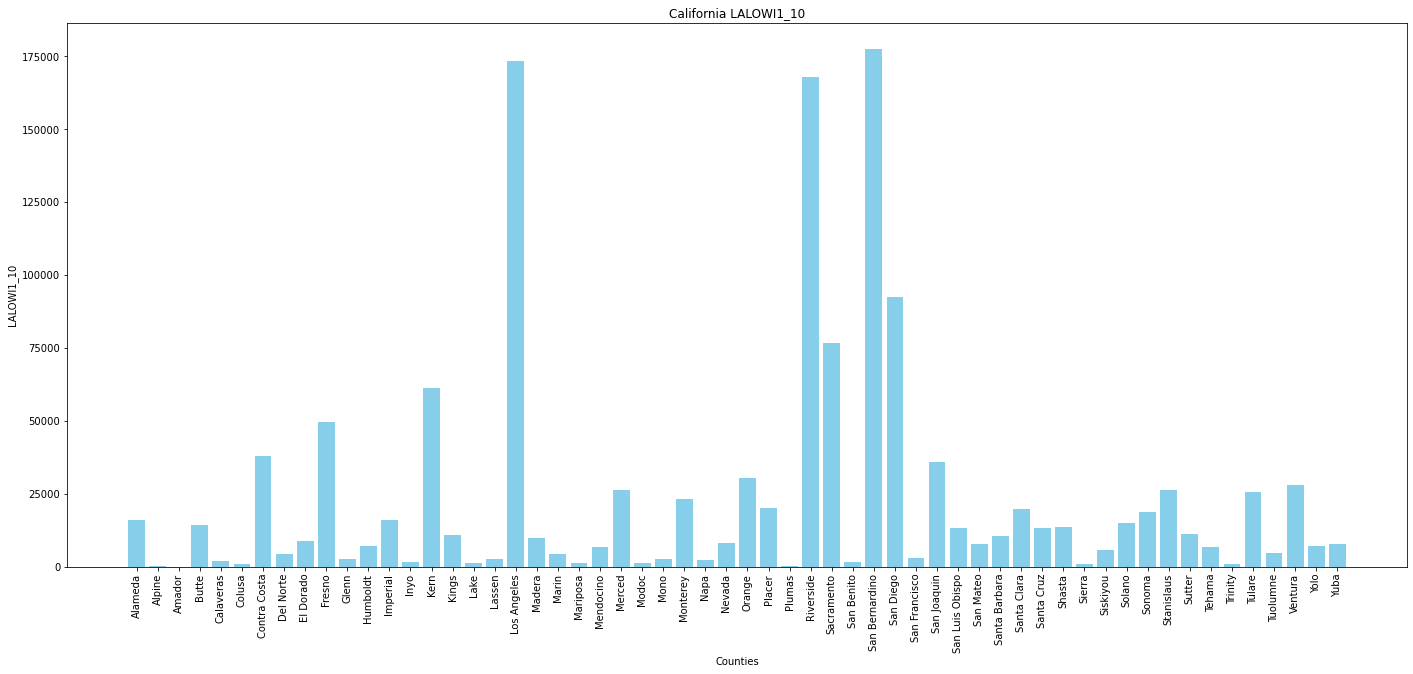

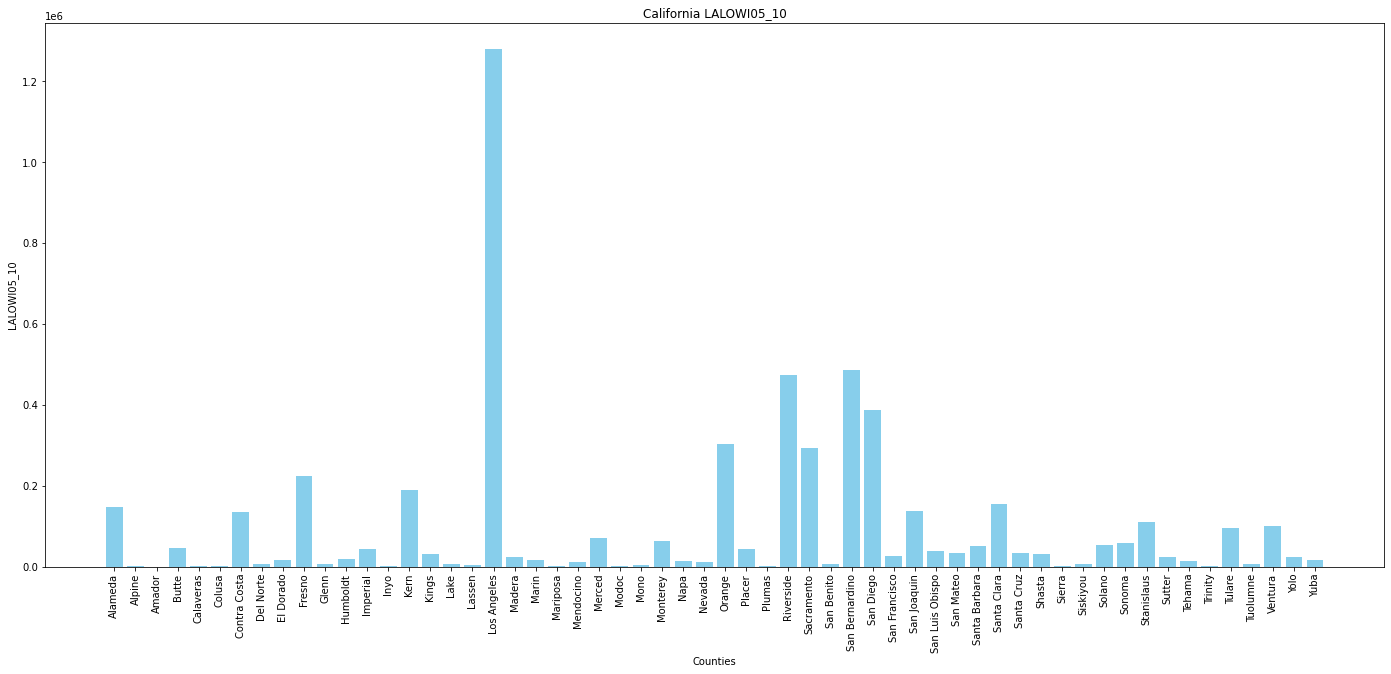

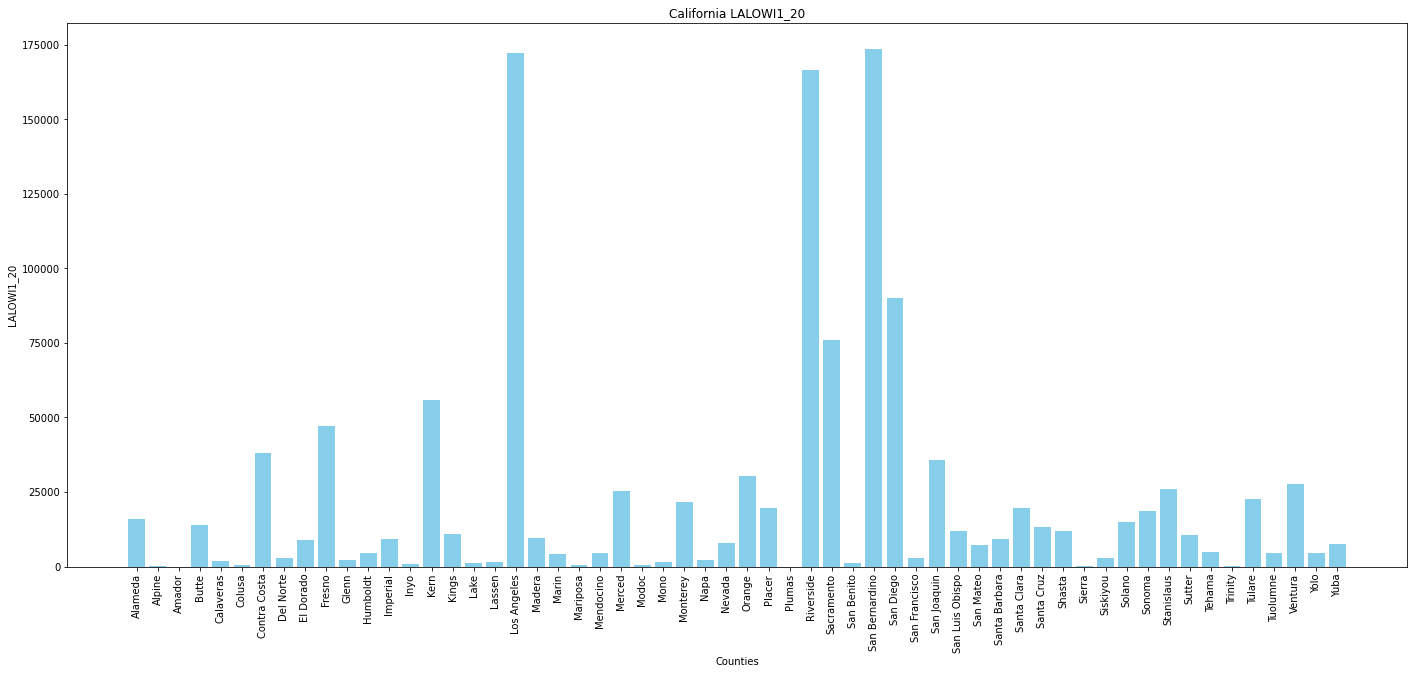

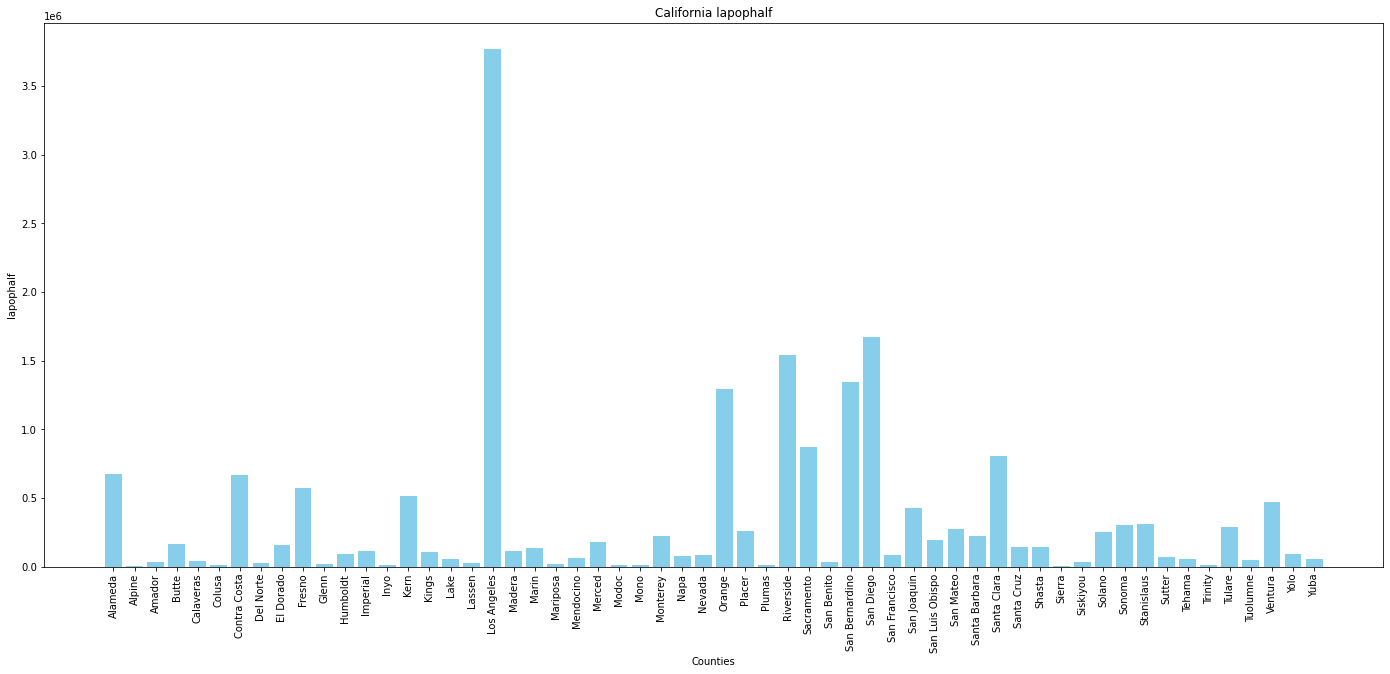

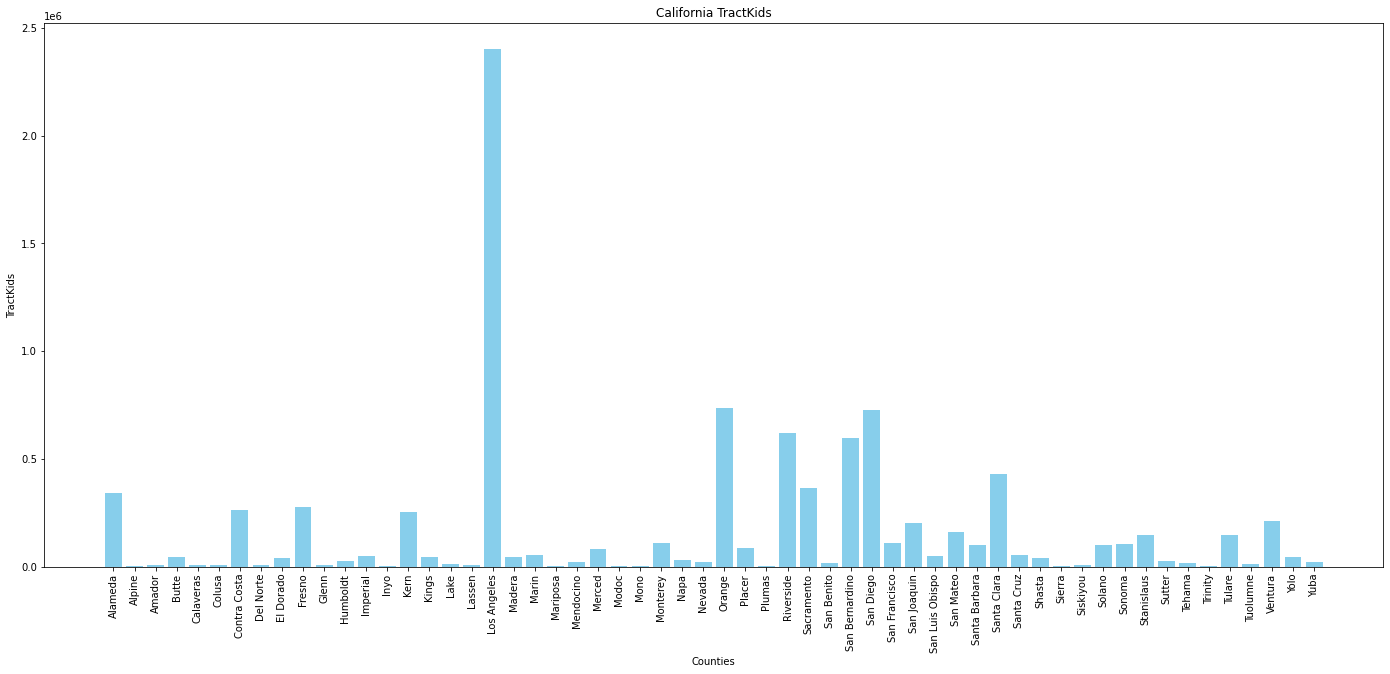

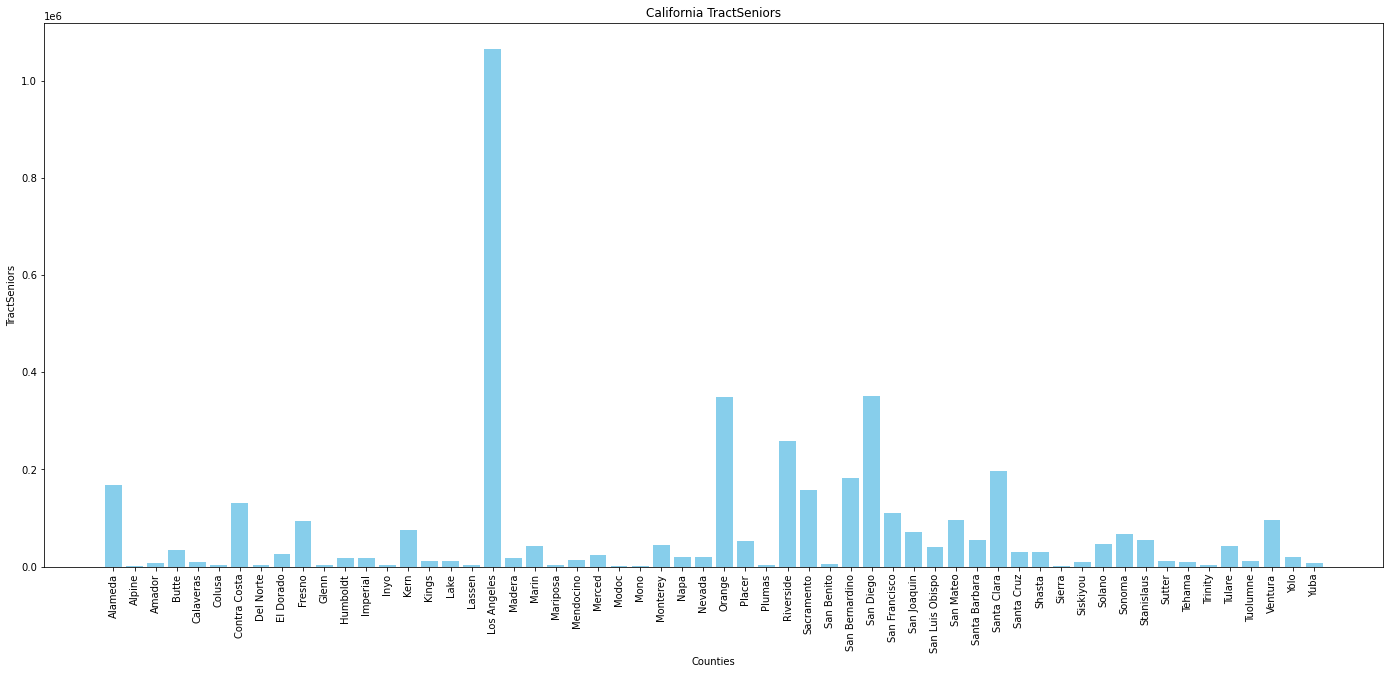

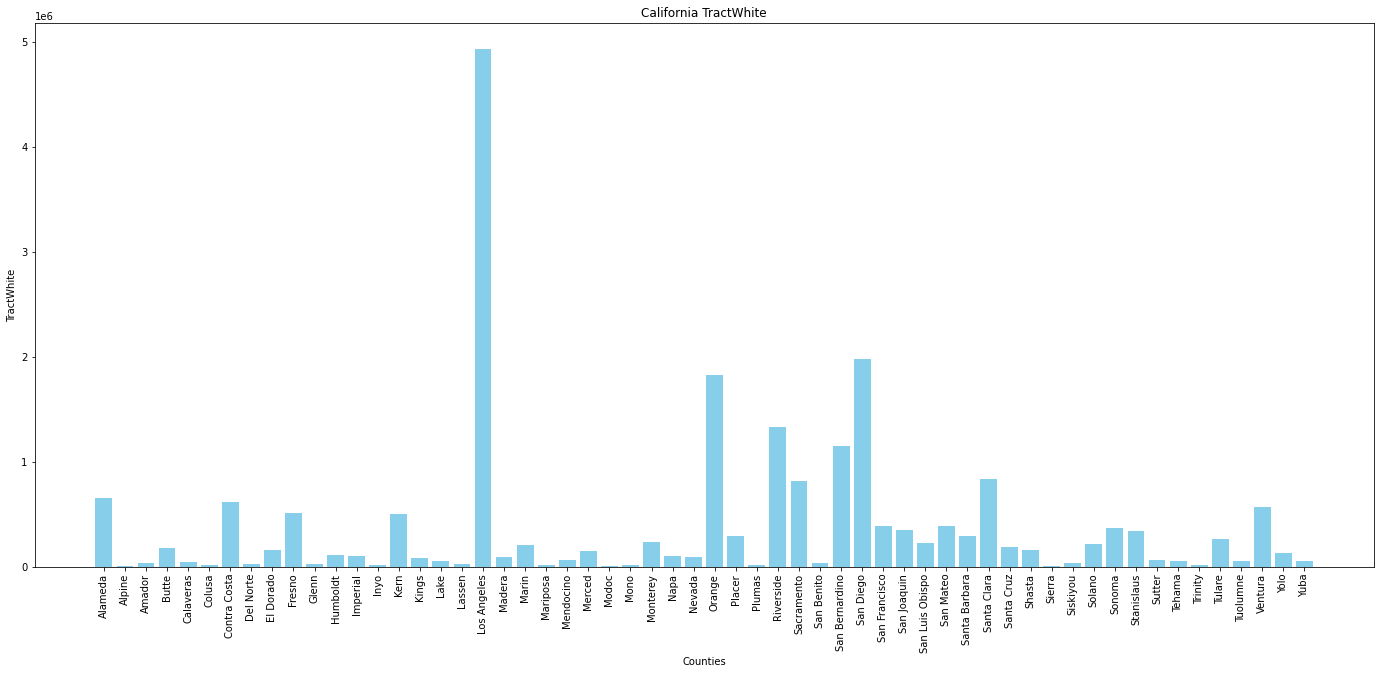

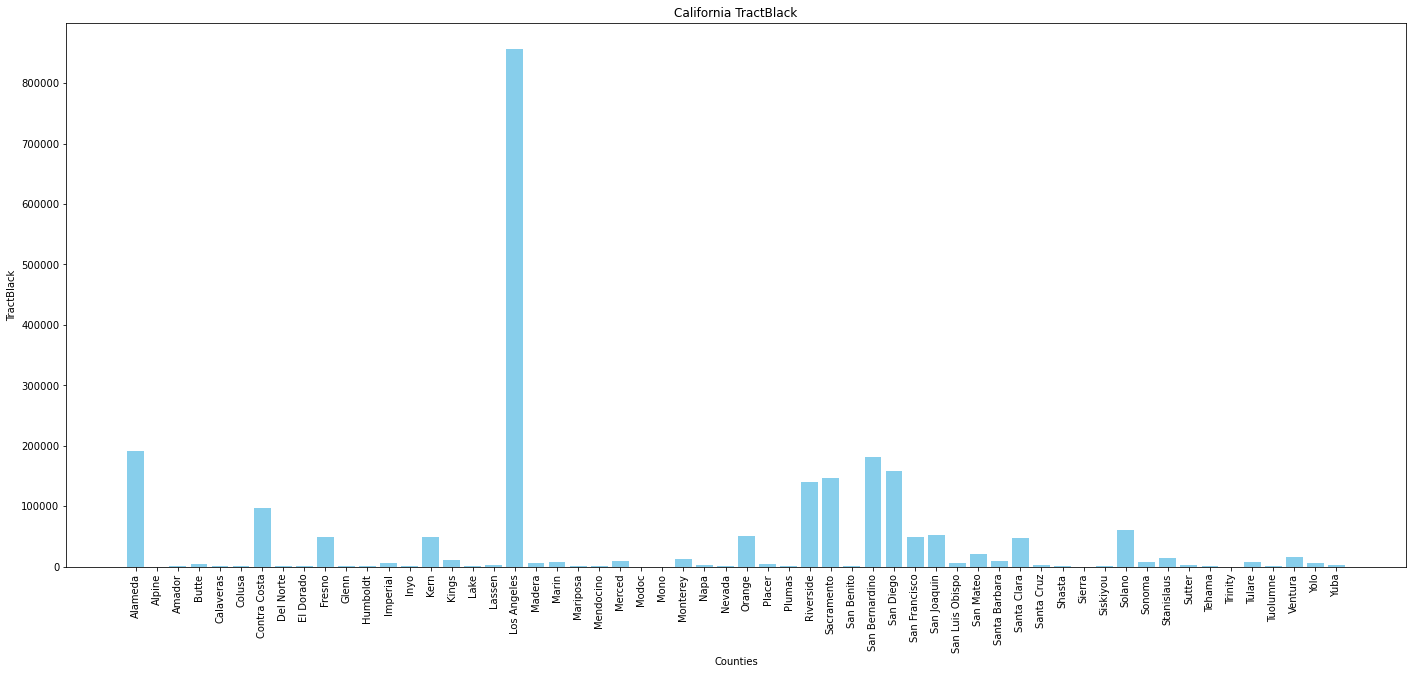

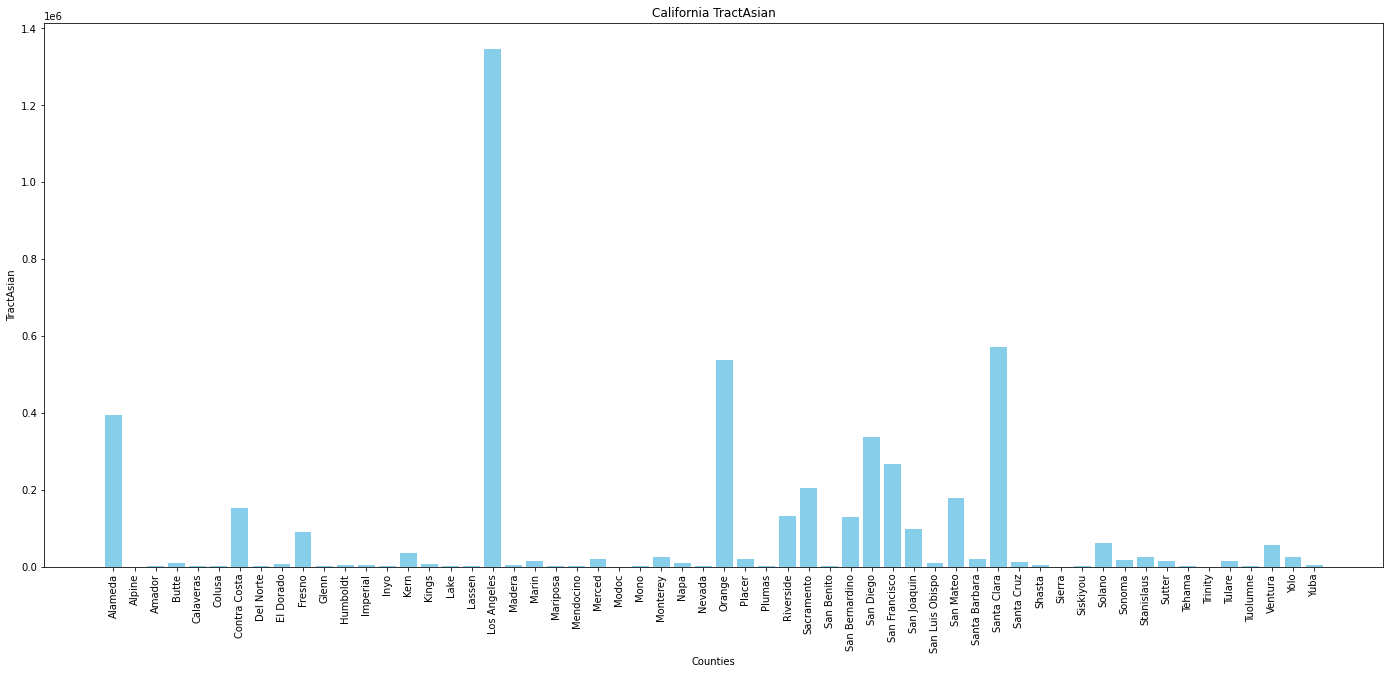

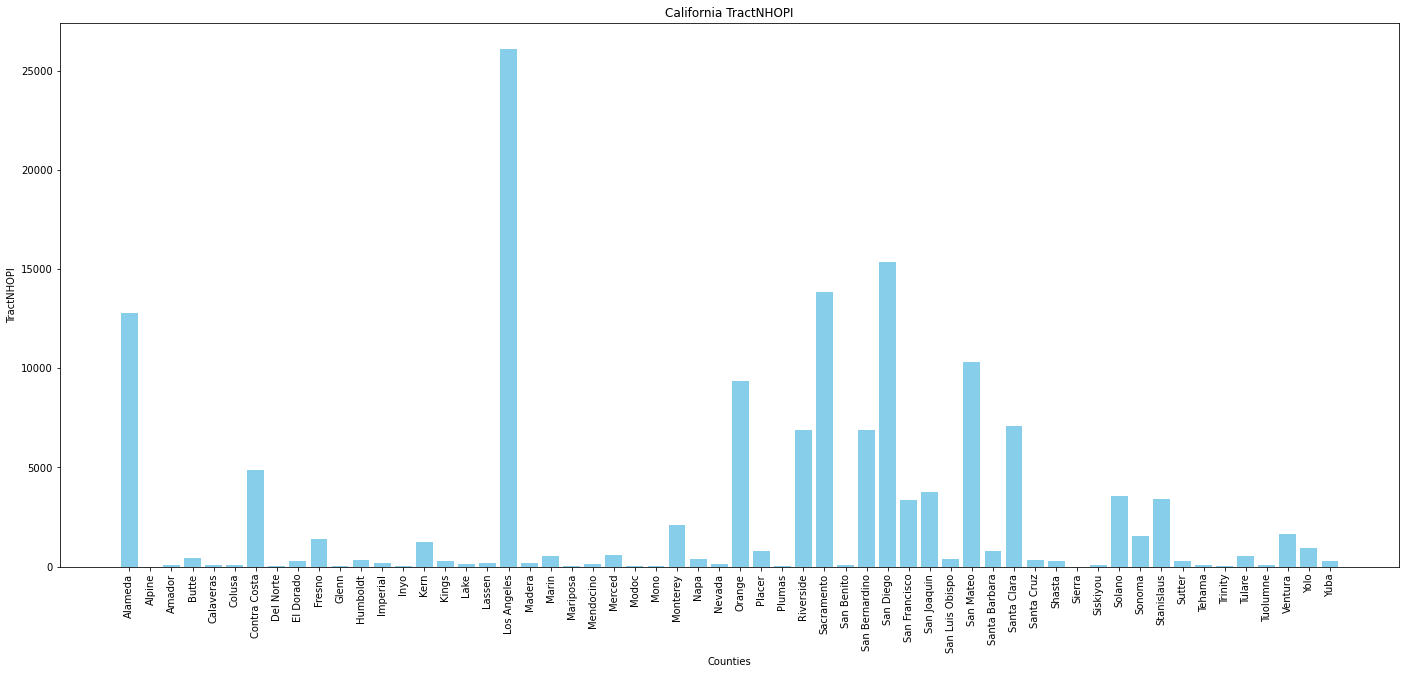

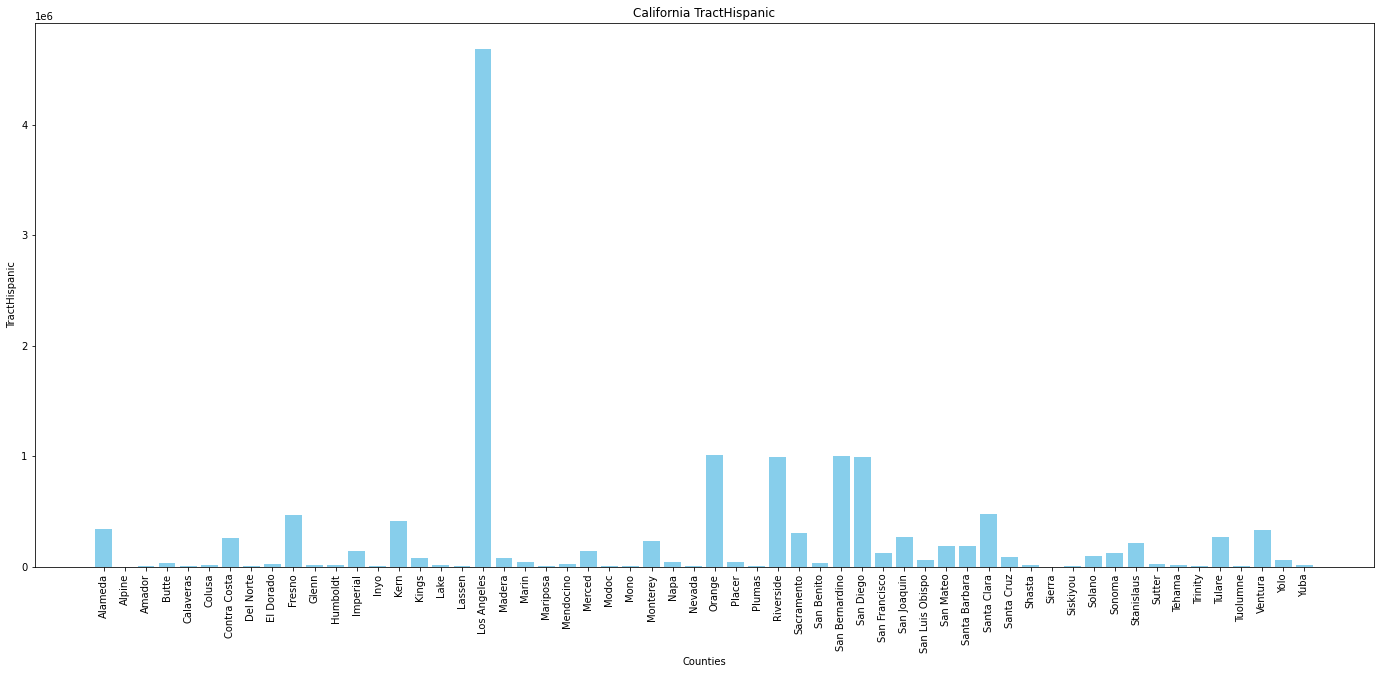

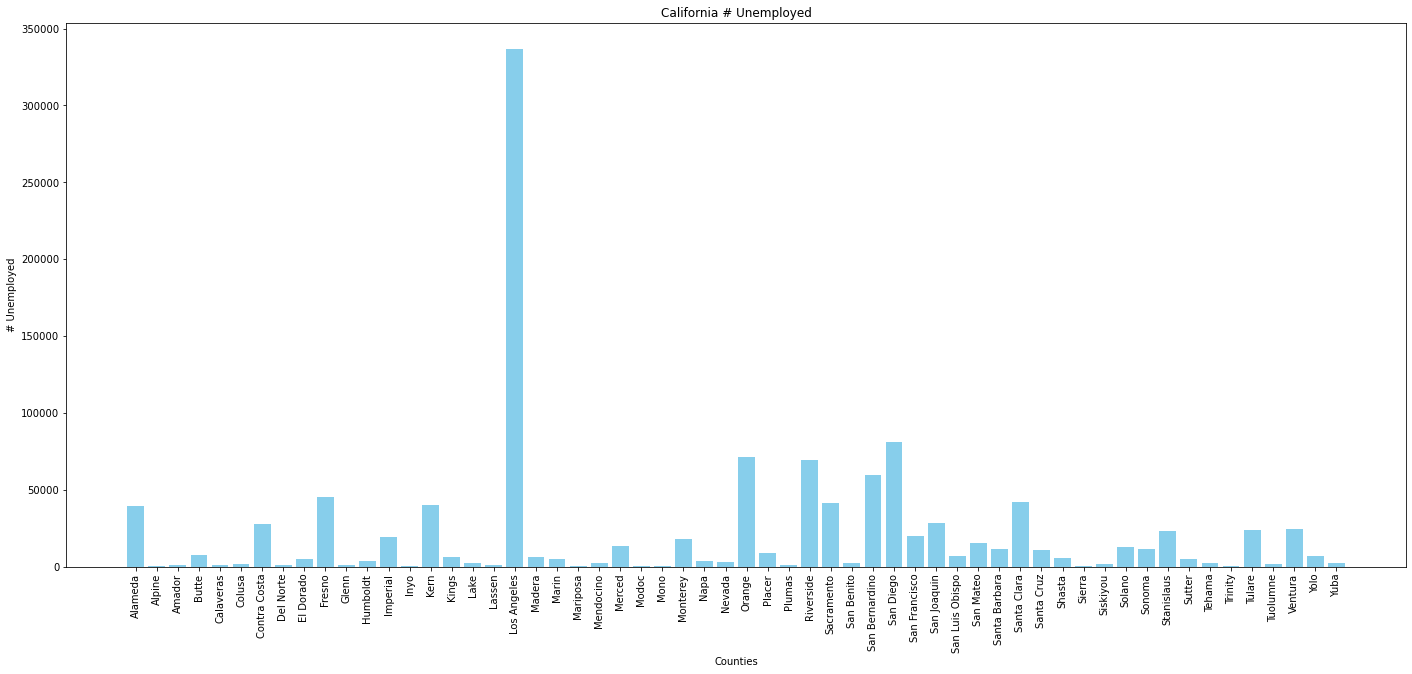

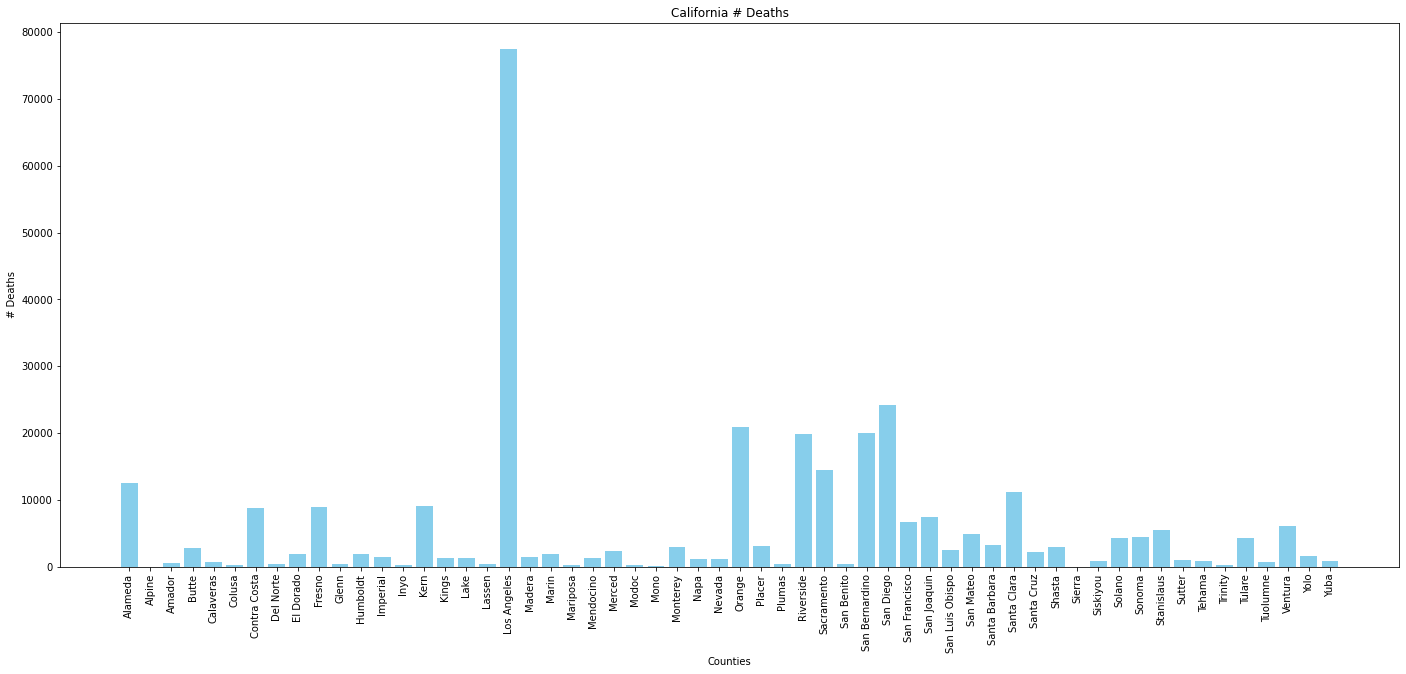

In [4]:
categories = ["POP2010", "LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10", "LALOWI05_10", 
             "LALOWI1_20", "lapophalf", "TractKids", "TractSeniors", "TractWhite", 
             "TractBlack", "TractAsian", "TractNHOPI", "TractHispanic", "# Unemployed", 
              "# Deaths"]

for category in categories:
    f, ax = plt.subplots(figsize=(24,10))
    y_axis = state[category].tolist()
    plt.bar(x_axis, y_axis, color='skyblue', align='center')
    tick_loc = [value for value in x_axis]
    plt.xticks(tick_loc, counties, rotation=90)
    plt.xlabel("Counties")
    plt.ylabel(category)
    plt.title(f"{the_state} {category}")
    plt.savefig(f'bar_graphs/{the_state}_{category}.png')
    plt.show()